<a href="https://colab.research.google.com/github/yogeshSmishra/Projects/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project**: **Mileage** **Prediction**

Import library

In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

IMPORT DATA

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')


In [6]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()


mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Removing missing values

In [11]:
df = df.dropna()


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

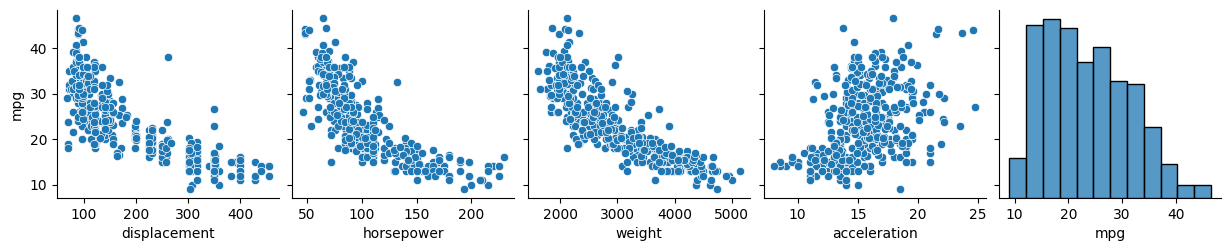

In [13]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')


<Axes: xlabel='displacement', ylabel='mpg'>

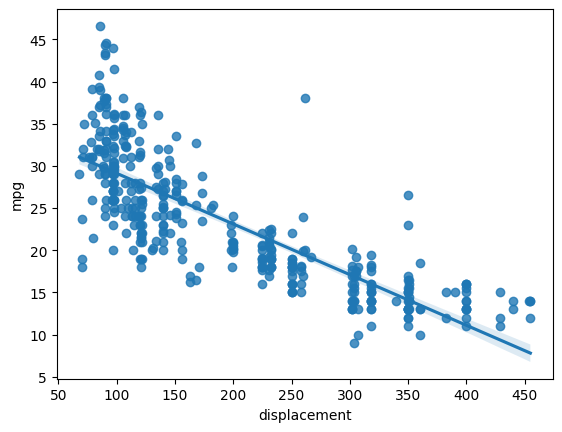

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)


Define Target Variable y and Feature X

In [15]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']


In [17]:
y.shape


(392,)

In [18]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]


In [19]:
x.shape


(392, 4)

Scaling Data


In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
ss = StandardScaler()
x = ss.fit_transform(x)
pd.DataFrame(x).describe()


,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


Train Test Split Data


In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

Linear Regression Model


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [26]:
lr.intercept_


23.30523205872996

In [27]:
lr.coef_


array([-0.80280226, -1.6188095 , -4.39319432, -0.25084747])

Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error



Predict Test Data


In [28]:
y_pred = lr.predict(xtest)
y_pred


array([22.47713161, 33.21739961, 11.75793916, 26.0179294 , 11.22484305,
       24.67695112, 26.56530659, 15.84180898, 19.1290155 , 30.66589991,
       23.18197551, 27.40389203, 32.30368809, 18.51005154, 23.49223175,
       30.57881846, 13.16974995, 30.46330157, 21.25031982, 30.54697242,
       11.98004672, 20.51337527, 23.87772413, 30.63629303, 21.47841851,
       23.70137071, 26.68290281, 30.15173558, 26.26000844,  9.49104114,
       23.77582669, 23.51437741, 26.78304812, 19.00021991, 29.23362071,
        9.23665866, 22.01760736, 10.92094323, 28.69547693, 28.44417951,
       22.50023569, 28.70285273, 11.3273642 , 15.78814674, 16.35251892,
       15.10882594, 18.64510322, 11.37285374, 31.06979535, 14.91522975,
       26.09350315, 22.99641121, 12.43337377, 19.78205381, 26.06313524,
       29.71923079, 32.00310352, 30.64855419, 30.70599912, 21.2695658 ,
       16.86084988, 29.19934624, 20.56596676, 15.36323889, 19.57452547,
       25.28044951, 16.56984958, 10.13076979,  8.98404399, 14.79

Model Accuracy


In [29]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
mean_absolute_error(ytest, y_pred)


3.261118161020945

In [30]:
mean_absolute_percentage_error(ytest, y_pred)


0.1394600985219644

In [31]:
r2_score(ytest, y_pred)


0.7322456415742087

Polynomial Regression


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
x_train2 = poly.fit_transform(xtrain)
x_test2 = poly.fit_transform(xtest)
lr.fit(x_train2, ytrain)

LinearRegression()

In [33]:
lr.intercept_


21.22109044685027

In [34]:
lr.coef_


array([-2.0384903 , -5.1902297 , -1.85512567, -1.1243847 ,  1.12745632,
        0.11209239,  0.05287197,  1.13741978, -0.62683558,  0.80954295])

In [35]:
y_pred_poly = lr.predict(x_test2)


Model Accuracy


In [36]:
mean_absolute_error(ytest, y_pred_poly)


2.896127352776405

In [37]:
mean_absolute_percentage_error(ytest, y_pred_poly)


0.12035430104898384

In [38]:
r2_score(ytest, y_pred_poly)


0.7829877035289137